In [82]:
from fedswarm import Platform

# basic config without any learning
config = {
    "data":{
        "path": "/mnt/ZOD",
        "version":"full",
        "ratio":1,
        "img_size": [400, 1420],
        "transforms": "",
        "shuffle_seed": 101,
        "decentralised_shuffle_seed": 101,
        "dataloader_args": {
            "batch_size": 32,
            "pin_memory": True,
            "shuffle": True,
        },
        "train_val_id_generator":"balanced_frames",
        "dataset_getitem":"interpolated_target_distances",
    },
    "model":{
        "name": "fixmatchseg",
        "args": {},
        "loss":"L1Loss",
        "optimiser":"Adam",
        "optimiser_args":{
            "lr": 0.0001,
        }
    }
}

platform = Platform(config, data_only=True, write=False)

No same run found, creating new run


Loading train frames:   0%|          | 0/89976 [00:00<?, ?it/s]

Loading val frames:   0%|          | 0/10024 [00:00<?, ?it/s]

In [81]:
from fedswarm.utils.data.utils.oxts import visualize_car_points, id_to_car_points
import matplotlib.pyplot as plt
import scienceplots

plt.style.use('science')
plt.rcParams['figure.dpi'] = 300
plt.rcParams["figure.figsize"] = (16,4)
plt.rcParams.update({'font.size': 8})

In [83]:
i = 650
zod_frames = platform.data.zod_frames

Text(0.5, 1.0, 'frame_id: 013620, i: 651')

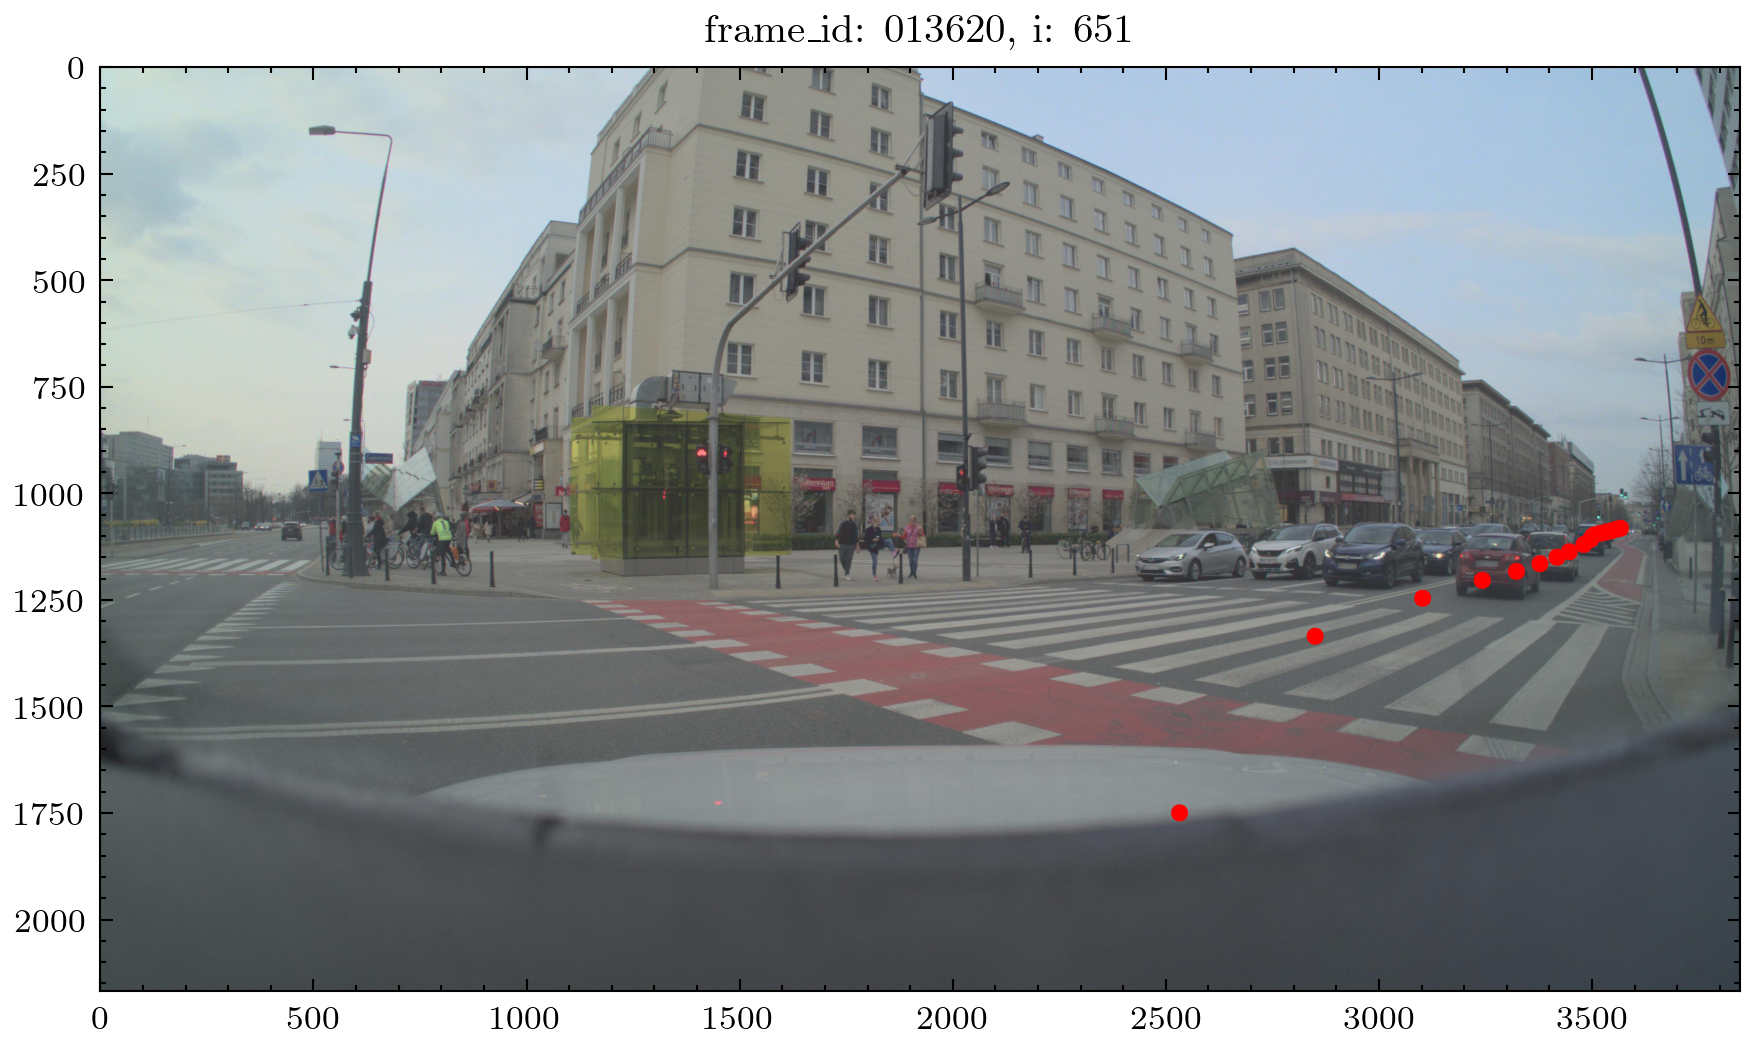

In [84]:
i += 1
img, label = platform.data.train.dataset[i]
frame_id = platform.data.train.dataset.frames_id_set[i]
render = visualize_car_points(zod_frames, frame_id, label.reshape(17, 3))
plt.imshow(render)
plt.title(f"frame_id: {frame_id}, i: {i}")